In [1]:
import os
import pandas as pd

In [2]:
from utils import CLASS_NAME_TO_ID, visualize

In [3]:
CLASS_NAME_TO_ID

{'Bus': 0, 'Truck': 1}

In [4]:
data_dir = './DRIVING-DATASET/Detection/'
data_df = pd.read_csv(os.path.join(data_dir, 'df.csv'))

In [5]:
data_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,fff2b15ad6007d0e,activemil,Truck,1,0.277344,0.622656,0.226389,0.859722,0,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
24058,fff376d20410e4c9,xclick,Bus,1,0.295625,0.558750,0.306667,0.397500,1,0,...,1,0,0.424375,0.316250,0.295625,0.558750,0.306667,0.397500,0.382500,0.335833
24059,fff376d20410e4c9,xclick,Bus,1,0.348125,0.701250,0.423333,0.744167,0,0,...,1,0,0.478750,0.493125,0.348125,0.701250,0.423333,0.744167,0.537500,0.523333
24060,fffde5953a818927,xclick,Bus,1,0.277500,0.605625,0.565000,0.795833,0,0,...,0,0,0.488125,0.277500,0.517500,0.605625,0.565000,0.670000,0.795833,0.704167


In [6]:
# listdir를 이용하여 images 디렉토리의 .jpg 파일을 읽어와서 0번 파일을 화면에 plt.imshow로 출력
index =0
image_files = [fn for fn in os.listdir('./DRIVING-DATASET/Detection/images/') if fn.endswith('jpg')]
image_file = image_files[index]
image_file

'0000599864fd15b3.jpg'

In [7]:
image_path = os.path.join('./DRIVING-DATASET/Detection/images/', image_file)

In [8]:
image_path

'./DRIVING-DATASET/Detection/images/0000599864fd15b3.jpg'

In [9]:
import cv2
import matplotlib.pyplot as plt

In [10]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
print(image.shape)

(170, 256, 3)


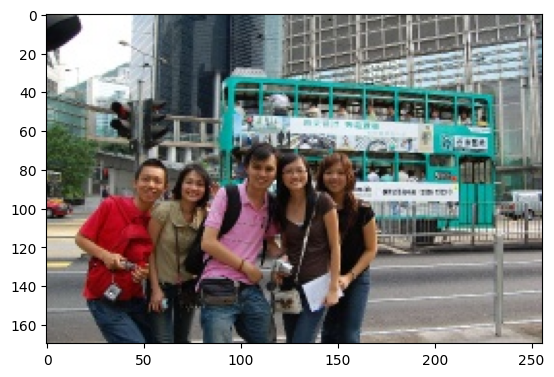

In [12]:
plt.imshow(image)

In [13]:
image_id = image_file.split('.')[0]
image_id

'0000599864fd15b3'

In [14]:
meta_data = data_df[data_df['ImageID'] == image_id]

In [15]:
meta_data

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.34375,0.90875,0.156162,0.650047,1,0,...,0,0,0.421875,0.34375,0.795,0.90875,0.156162,0.5127,0.650047,0.457197


In [16]:
cate_names = meta_data['LabelName'].values

In [17]:
cate_names

array(['Bus'], dtype=object)

In [18]:
bboxes = meta_data[['XMin', 'XMax', 'YMin','YMax']].values

In [19]:
bboxes

array([[0.34375 , 0.90875 , 0.156162, 0.650047]])

In [20]:
img_H, img_W, _ = image.shape
class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]

In [21]:
class_ids

[0]

In [22]:
unnorm_bboxes = bboxes.copy()
unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]] # XMax, YMin의 자리를 바꿈
unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:,0:2] # XMax - XMin, YMax - YMin
unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:,2:4]/2) # X_cen, Y_cen = XMin +w/2, YMin +h/2

unnorm_bboxes[:, [0,2]] *= img_W
unnorm_bboxes[:, [1,3]] *= img_H


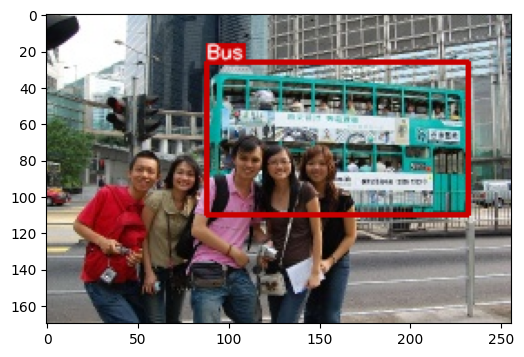

In [24]:
canvas = visualize(image, unnorm_bboxes, class_ids)
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [25]:
from ipywidgets import interact

In [86]:
@interact(index=(0,len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join('./DRIVING-DATASET/Detection/images/', image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_id = image_file.split('.')[0]
    meta_data = data_df[data_df['ImageID'] == image_id]
    cate_names = meta_data['LabelName'].values
    bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values
    
    img_H, img_W, _ = image.shape
    
    class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]
    unnorm_bboxes = bboxes.copy()
    unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]] # XMax, YMin의 자리를 바꿈
    unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:,0:2] # XMax - XMin, YMax - YMin
    unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:,2:4]/2) # X_cen, Y_cen = XMin +w/2, YMin +h/2

    unnorm_bboxes[:, [0,2]] *= img_W
    unnorm_bboxes[:, [1,3]] *= img_H
    canvas = visualize(image, unnorm_bboxes, class_ids)
    
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=15224), Output()), _dom_classes=('widget-int…

# Object detection 데이터셋 구축과 연산을 위한 텐서변환 모듈 작성하기

In [33]:
import torch
import numpy as np

In [42]:
class Detection_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.data_dir = data_dir
        self.phase = phase
        self.transformer = transformer
        self.data_df = pd.read_csv(os.path.join(self.data_dir, 'df.csv'))
        self.image_files = [fn for fn in os.listdir(os.path.join(self.data_dir, phase)) if fn.endswith('jpg')]
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        filename, image = self.get_image(index)
        bboxes, class_ids = self.get_label(filename)
        img_H, img_W, _ = image.shape
        if self.transformer:
            image = self.transformer(image)
            _, img_H, img_W = image.shape
        
        bboxes[:, [0, 2]] *= img_W
        bboxes[:, [1, 3]] *= img_H
        
        target = {}
        target['boxes'] = torch.Tensor(bboxes).float()
        target['labels'] = torch.Tensor(class_ids).long()
        
        return image, target, filename

    def get_image(self, index):
        filename = self.image_files[index]
        image_path = os.path.join(self.data_dir, self.phase, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return filename, image
    
    def get_label(self, filename):
        image_id = filename.split('.')[0]
        meta_data = self.data_df[self.data_df['ImageID'] == image_id]
        cate_names = meta_data['LabelName'].values
        class_ids = np.array([CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names])
        bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values
        bboxes[:, [1, 2]] = bboxes[:, [2, 1]]
        return bboxes, class_ids

In [43]:
data_dir = './DRIVING-DATASET/Detection/'
dataset = Detection_dataset(data_dir = data_dir, phase='train', transformer=None)

In [44]:
len(dataset)

13703

In [45]:
# X1, Y1, X2, Y2 = XMin, YMin, XMax, YMax --> 일반적인 bbox 그리기
# X_cen, Y_cen, W, H --> YOLO SERIES
# X_Min, Y_Min, W, H --> COCO BOUNDING BOX FROMAT

In [57]:
image, target, filename = dataset[0]

In [58]:
image.shape

(170, 256, 3)

In [49]:
image, target, filename = dataset[2]

In [50]:
image.shape

(144, 256, 3)

In [51]:
target

{'boxes': tensor([[ 40.0000,  38.7631,  95.0400, 101.5528]]),
 'labels': tensor([0])}

In [59]:
filename

'0000599864fd15b3.jpg'

In [56]:
dataset.data_df.iloc[0]

ImageID        0000599864fd15b3
Source                   xclick
LabelName                   Bus
Confidence                    1
XMin                    0.34375
XMax                    0.90875
YMin                   0.156162
YMax                   0.650047
IsOccluded                    1
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
XClick1X               0.421875
XClick2X                0.34375
XClick3X                  0.795
XClick4X                0.90875
XClick1Y               0.156162
XClick2Y                 0.5127
XClick3Y               0.650047
XClick4Y               0.457197
Name: 0, dtype: object

In [63]:
0.34375 * 256

88.0

In [64]:
0.90875*256

232.64

In [65]:
0.156162*170

26.547539999999998

In [66]:
0.750047*170

127.50799

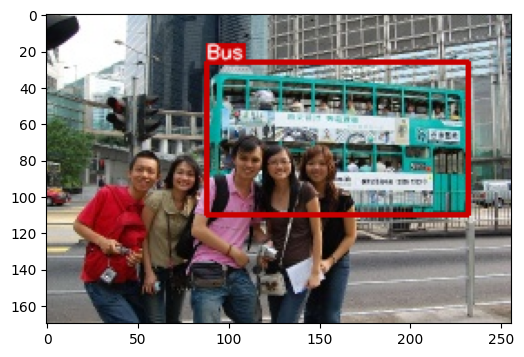

In [80]:
boxes = target['boxes']. numpy()
class_ids = target['labels'].numpy()

n_obj = boxes.shape[0]
bboxes = np.zeros(shape = (n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:,0:2]+ boxes[:, 2:4]) /2
bboxes[:, 2:4] = boxes[:,2:4]- boxes[:, 0:2]

canvas = visualize(image, bboxes, class_ids)

plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()


In [90]:
@interact(index=(0, len(image_files)-1))
def show_sampe(index=0):
    image, target, filename = dataset[index]
    boxes = target['boxes'].numpy()
    class_ids = target['labels'].numpy()
    
    n_obj = boxes.shape[0]
    bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
    bboxes[:, 0:2] = (boxes[:, 0:2]+ boxes[:,2:4])/2
    bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]
    
    canvas = visualize(image, bboxes, class_ids)
    
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=15224), Output()), _dom_classes=('widget-int…

In [91]:
from torchvision import transforms

In [97]:
IMAGE_SIZE = 448

transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229,0.224,0.225])
])

In [98]:
data_dir = './DRIVING-DATASET/Detection/'
transformed_dataset = Detection_dataset(data_dir = data_dir, phase='train', transformer=transformer)

In [99]:
from torchvision.utils import make_grid

In [101]:
index = 5
image, target, filename = transformed_dataset[index] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


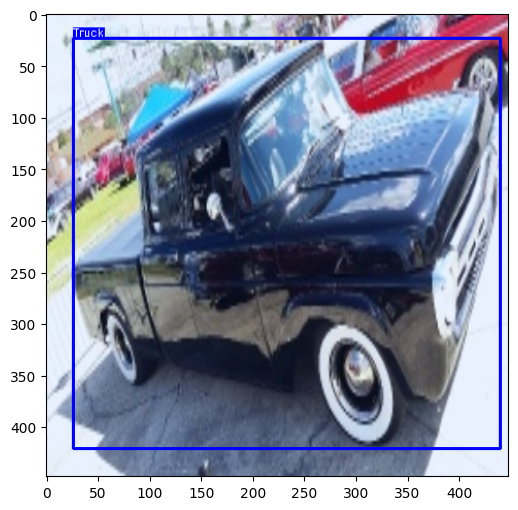

In [105]:
np_image = make_grid(image, normalize=True).permute(1, 2, 0).numpy()
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()
    
n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2]+ boxes[:,2:4])/2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]
    
canvas = visualize(np_image, bboxes, class_ids)
    
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [106]:
from torch.utils.data import DataLoader

In [112]:
def collate_fn(batch):
    image_list = []
    target_list = []
    filename_list = []
    
    for a, b, c in batch:
        image_list.append(a)
        target_list.append(b)
        filename_list.append(c)
        
    return image_list, target_list, filename_list



In [113]:
data_dir = './DRIVING-DATASET/Detection/'
BATCH_SIZE = 6

trainset = Detection_dataset(data_dir=data_dir, phase='train', transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [114]:
for index, batch in enumerate(trainloader):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]
    
    if index == 0:
        break

In [122]:
def build_dataloader(data_dir, batch_size=4, image_size=448):
    # transforms.Compose
    # dataloaders = {}
    transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229,0.224,0.225])
])
    dataloaders = {}
    train_dataset = Detection_dataset(data_dir=data_dir, phase='train', transformer=transformer)
    dataloaders['train'] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    
    val_dataset = Detection_dataset(data_dir=data_dir, phase='val', transformer=transformer)
    dataloaders['val'] = DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
    return dataloaders

In [124]:
data_dir = './DRIVING-DATASET/Detection/'
dloaders = build_dataloader(data_dir, batch_size=4, image_size=448)

for phase in ['train', 'val']:
    for index, batch in enumerate(dloaders[phase]):
        images = batch[0]
        targets = batch[1]
        filenames = batch[2]
        print(targets)
        if index ==0:
            break

[{'boxes': tensor([[ 62.4400, 108.6400, 265.4400, 303.1468]]), 'labels': tensor([0])}, {'boxes': tensor([[104.4400,  49.2800, 399.5600, 412.9068]]), 'labels': tensor([0])}, {'boxes': tensor([[ 63.2800, 126.0788, 328.7200, 381.5983]]), 'labels': tensor([1])}, {'boxes': tensor([[113.1200, 180.6932, 369.6000, 410.6668]]), 'labels': tensor([1])}]
[{'boxes': tensor([[  0.0000, 261.8237, 208.8800, 415.2194]]), 'labels': tensor([1])}]


# Faster R-CNN 아키텍처 불러오기

### Object Detection
* 다수의 사물이 존재하는 상황에서 각 사물의 위치와 클래스를 찾는 작업

### Object Detection 방식
* 2-Stage Detector
아래 2문제를 구분해서 순차적으로 해결하는 방식
    * 위치를 찾는 문제(Localization)
        - 물체가 있을법한 위치를 찾음
        - 하나의 이미지 안에서 물체가 있을법한 위치를 찾아 나열하는 과정에 대한 정보를 제안
    * 분류 문제(Classification)
        - 각각의 위치에 대해서 class를 분류
        - 이미지 내의 사물이 존재하는 bounding box를 예측하는 regression 사용
        
* 1-Stage Dectector
    * 위치를 찾는 문제와 분류 문제를 한 번에 해결함
    * 정확도는 2-Stage Detector보다 낮음
    * 정확도는 낮지만 속도가 빠르기 때문에 많이 사용
    * 대표적인 예시는 YOLO

### R-CNN(Regions with CNN features) 기법
* Selective search를 이용해 2000개의 RoI를 추출
* 각 RoI에 대하여 warping을 수행하여 동일한 크기의 입력 이미지로 변경
* 이미지를 CNN에 넣어서(forward) 벡터(특징) 이미지를 추출
* 해당 feature를 SVM에 넣어 class 분류 결과를 얻음
* 해당 feature를 regressor에 넣어 위치를 조절해 예측

### R-CNN의 단점
* 입력 이미지에 대해 CPU 기반의 Selective search를 진행하므로 많은 시간이 소요
* 전체 아키텍처에서 SVM, Regressor 모듈이 CNN과 분리되어 있음
* CNN은 고정되므로 SVM과 Regression 결과로 CNN을 업데이트할 수 없음
* end-to-end 방식으로 학습 불가능

### Fast R-CNN
* 동일한 Region proposal을 이용하되 이미지를 한 번만 CNN에 넣어 Feature Map을 생성

#### 👻Region proposal
물체가 있을 법한 위치 찾기
- 이미지에서 다양한 형태의 윈도우를 슬라이딩하며 물체가 존재하는지 확인
- 너무 많은 영역에 대해 확인해야 한다는 단점
- Fast R-CNN, Faster R-CNN은 sliding window 방식을 사용